# Posttest KB 7: Image Augmentation

##### Link dataset Citra https://www.kaggle.com/datasets/anshtanwar/microscopic-fungi-images

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d anshtanwar/microscopic-fungi-images

 97% 87.0M/89.8M [00:03<00:00, 38.7MB/s]
100% 89.8M/89.8M [00:03<00:00, 29.6MB/s]


In [20]:
!unzip microscopic-fungi-images.zip -d dataset_directory

Streaming output truncated to the last 5000 lines.
  inflating: dataset_directory/train/H1/H1_89a_5.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_89a_6.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_89a_7.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_89b_2.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8a_11.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8a_4.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8a_5.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8b_3.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8b_8.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8b_9.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8c_6.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8c_7.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8d_2.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8d_4.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_8d_9.jpg.jpg  
  inflating: dataset_directory/train/H1/H1_90a_3.jpg.jpg  
  inflating: da

In [21]:
!unzip microscopic-fungi-images.zip -d deFungi_dataset

Streaming output truncated to the last 5000 lines.
  inflating: deFungi_dataset/train/H1/H1_89a_5.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_89a_6.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_89a_7.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_89b_2.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8a_11.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8a_4.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8a_5.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8b_3.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8b_8.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8b_9.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8c_6.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8c_7.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8d_2.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8d_4.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_8d_9.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_90a_3.jpg.jpg  
  inflating: deFungi_dataset/train/H1/H1_90a_8.

* Import Library yang digunakan

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [23]:
path = '/content/deFungi_dataset/test'

In [24]:
import os

In [26]:
jenis = os.listdir(path)
jenis

['H1', 'H2', 'H3', 'H5', 'H6']

* Mengatur path dataset menjadi 3 train, val, test

In [27]:
train_dir = '/content/deFungi_dataset/train'
validation_dir = '/content/deFungi_dataset/valid'
test_dir = '/content/deFungi_dataset/test'

* Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Split dataset menjadi train, val, dan test

* Data Test

In [30]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 902 images belonging to 5 classes.


* Data Train

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 5000 images belonging to 5 classes.


* Data Valid

In [32]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 899 images belonging to 5 classes.


### Membuat model sequential

In [33]:
model = Sequential()

### Menggunakan pre-trained model VGG16

In [34]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 2s 0us/step


### Menggunakan optimizer, loss, dan metrics

In [35]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Callbacks

In [36]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

### Latih Model

In [37]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
157/157 [==============================] - 52s 258ms/step - loss: -1851.6028 - accuracy: 0.1992 - val_loss: -538.7678 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 2/5
157/157 [==============================] - 40s 252ms/step - loss: -13835.4580 - accuracy: 0.2000 - val_loss: -2377.4014 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 3/5
157/157 [==============================] - 40s 252ms/step - loss: -39479.2891 - accuracy: 0.2000 - val_loss: -5516.8955 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 4/5
157/157 [==============================] - 39s 248ms/step - loss: -77750.9609 - accuracy: 0.2000 - val_loss: -9833.0400 - val_accuracy: 0.2581 - lr: 0.0010
Epoch 5/5
157/157 [==============================] - 40s 251ms/step - loss: -128156.2734 - accuracy: 0.2000 - val_loss: -15314.1250 - val_accuracy: 0.2581 - lr: 0.0010


### Evaluasi model

In [38]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

29/29 [==============================] - 3s 90ms/step - loss: -16399.0293 - accuracy: 0.2583
Akurasi pada data test: 0.26


### Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

### Grafik Accuracy

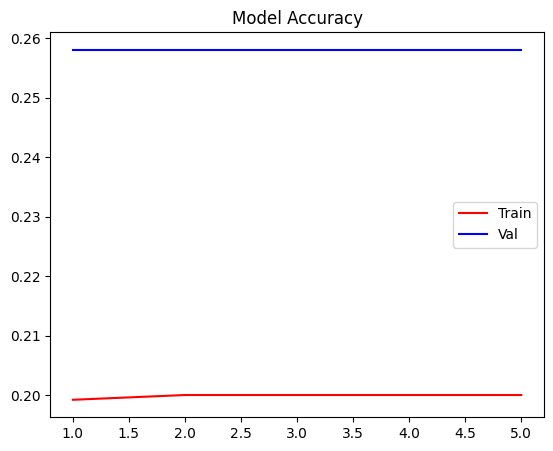

In [40]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

### Grafik Loss

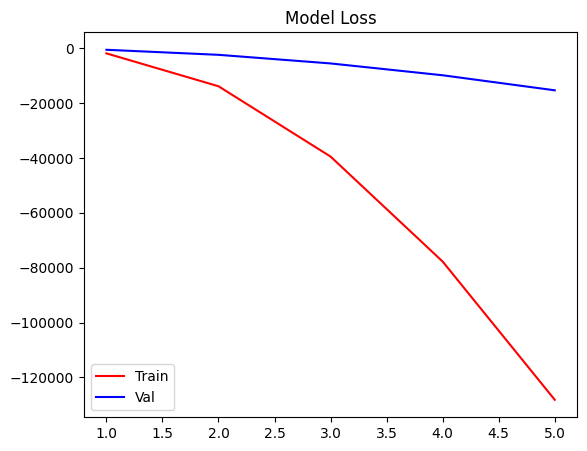

In [41]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

In [42]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [44]:
path_gambar = '/content/deFungi_dataset/train/H1/H1_100a_1.jpg.jpg'

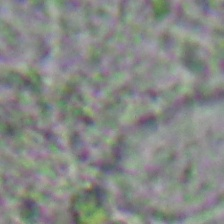

In [45]:
image = load_img(path_gambar)
image

In [46]:
bright = random_brightness(image, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

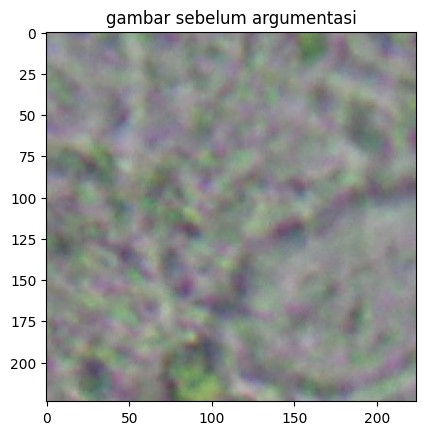

In [47]:
plt.imshow(image)
plt.title('gambar sebelum argumentasi')